In [3]:
library(astsa)
library(forecast)

In [1]:
SUV<-read.csv('monthly-sales.csv')
suv<-ts(SUV$Sales)

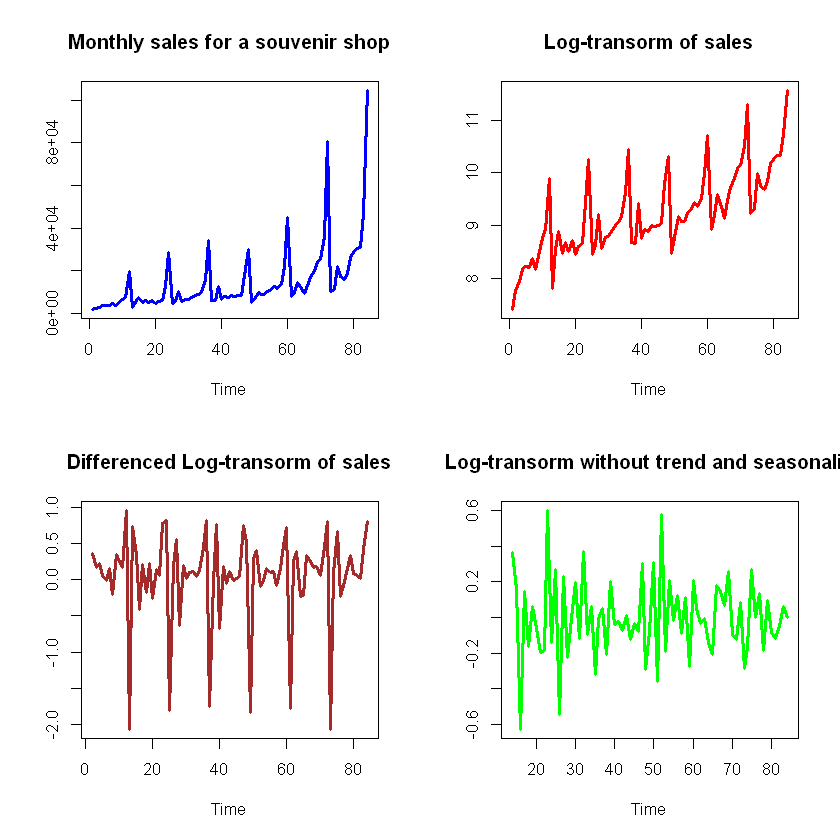

In [4]:
# Removing trend and seasonality from the time series data
par(mfrow=c(2,2))

plot(suv, main='Monthly sales for a souvenir shop', ylab='', col='blue', lwd=3)
plot(log(suv), main='Log-transorm of sales', ylab='', col='red', lwd=3)
plot(diff(log(suv)), main='Differenced Log-transorm of sales', ylab='', col='brown', lwd=3)
plot(diff(diff(log(suv)),12), main='Log-transorm without trend and seasonaliy', ylab='', col='green', lwd=3)

#### The last plot shows how the transformed data does not present trend or seasonality

ACF,-0.46,0.19,-0.17,-0.06,0.01,0.00,-0.07,0.07,0.09,0.02,...,-0.04,-0.07,0.10,-0.01,0.03,0.02,0.03,-0.03,0.00,-0.05
PACF,-0.46,-0.02,-0.11,-0.23,-0.13,-0.07,-0.20,-0.12,0.11,0.11,...,0.01,-0.21,0.03,0.13,-0.05,-0.01,0.02,0.04,-0.02,-0.02


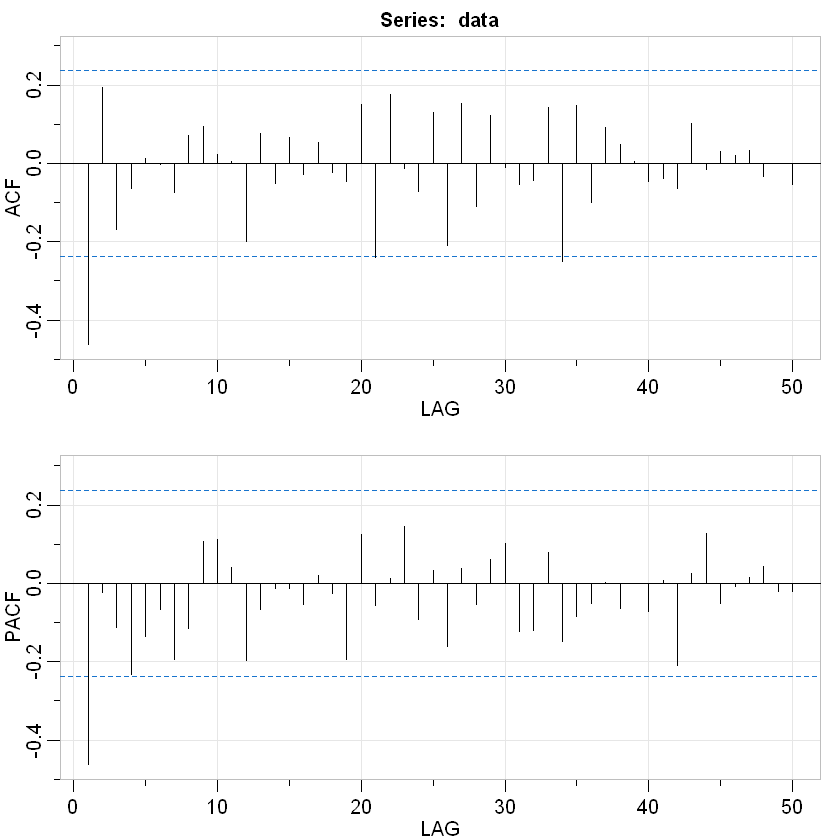

In [5]:
data<-diff(diff((log(suv)),12))
acf2(data, 50)

#### The PACF value at lag=1 is significant, as well as the ACF at lag=1 

In [6]:
# Here I will try various combination of SARIMA orders to find the best fit 
# to the log-transformed data
#    parameter d=1: differences the log(suv)
#    parameter DD=1: differences the data in 12-monthly intervals
#    parameter per=12: captures the 12-monthly seasonality of the data

d=1
DD=1
per=12
for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(suv), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= -11.60664  SSE= 3.432906  p-VALUE= 0.0001365566 
0 1 0 0 1 1 12 AIC= -16.09179  SSE= 2.97756  p-VALUE= 3.149952e-05 
0 1 0 0 1 2 12 AIC= -17.58234  SSE= 2.301963  p-VALUE= 0.0002456591 
0 1 0 0 1 3 12 AIC= -16.41016  SSE= 2.35266  p-VALUE= 0.0003392283 
0 1 0 1 1 0 12 AIC= -13.43083  SSE= 3.214065  p-VALUE= 4.083839e-05 
0 1 0 1 1 1 12 AIC= -17.76362  SSE= 2.399746  p-VALUE= 0.0001916565 
0 1 0 1 1 2 12 AIC= -15.99095  SSE= 2.349897  p-VALUE= 0.0002477782 
0 1 0 1 1 3 12 AIC= -14.74777  SSE= 2.302026  p-VALUE= 0.0004504601 
0 1 1 0 1 0 12 AIC= -27.78538  SSE= 2.643277  p-VALUE= 0.1742478 
0 1 1 0 1 1 12 AIC= -34.54538  SSE= 2.233424  p-VALUE= 0.2730783 
0 1 1 0 1 2 12 AIC= -33.6145  SSE= 2.109473  p-VALUE= 0.2830597 
0 1 1 0 1 3 12 AIC= -32.19273  SSE= 1.87789  p-VALUE= 0.270042 
0 1 1 1 1 0 12 AIC= -32.33192  SSE= 2.360507  p-VALUE= 0.2584529 
0 1 1 1 1 1 12 AIC= -34.0881  SSE= 1.842013  p-VALUE= 0.2843225 
0 1 1 1 1 2 12 AIC= -32.1017  SSE= 1.856342  p-VALUE= 0.28

#### AIC=-34.989 is the smalles value from the above results

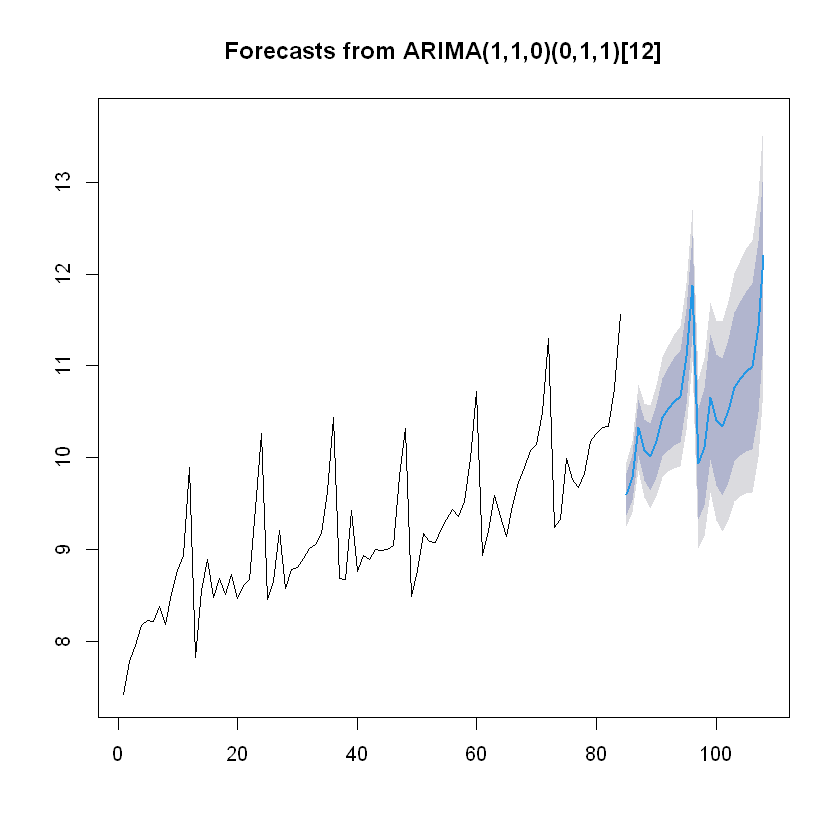

In [7]:
model<- arima(x=log(suv), order = c(1,1,0), seasonal = list(order=c(0,1,1), period=12))
plot(forecast(model))

In [8]:
forecast(model)

    Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
 85       9.600019  9.373968  9.826071  9.254303  9.945736
 86       9.786505  9.533944 10.039066  9.400246 10.172764
 87      10.329605 10.025423 10.633786  9.864399 10.794810
 88      10.081973  9.746705 10.417240  9.569225 10.594720
 89      10.008096  9.638604 10.377587  9.443007 10.573184
 90      10.181170  9.783094 10.579245  9.572365 10.789974
 91      10.439372 10.013362 10.865383  9.787845 11.090900
 92      10.534857 10.083237 10.986477  9.844164 11.225551
 93      10.613026 10.136886 11.089165  9.884833 11.341218
 94      10.664526 10.165207 11.163846  9.900883 11.428170
 95      11.096784 10.575248 11.618321 10.299163 11.894406
 96      11.877167 11.334355 12.419979 11.047007 12.707326
 97       9.932756  9.330373 10.535139  9.011491 10.854021
 98      10.112194  9.475681 10.748707  9.138731 11.085657
 99      10.658829  9.980844 11.336814  9.621940 11.695718
100      10.409423  9.696788 11.122058  9.319542 11.4993

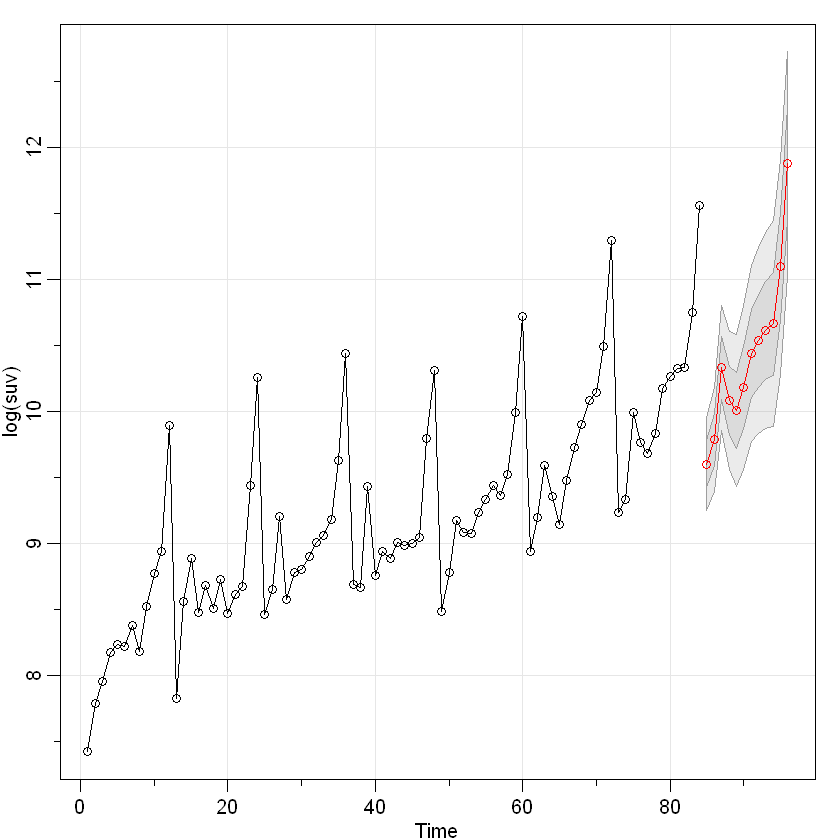

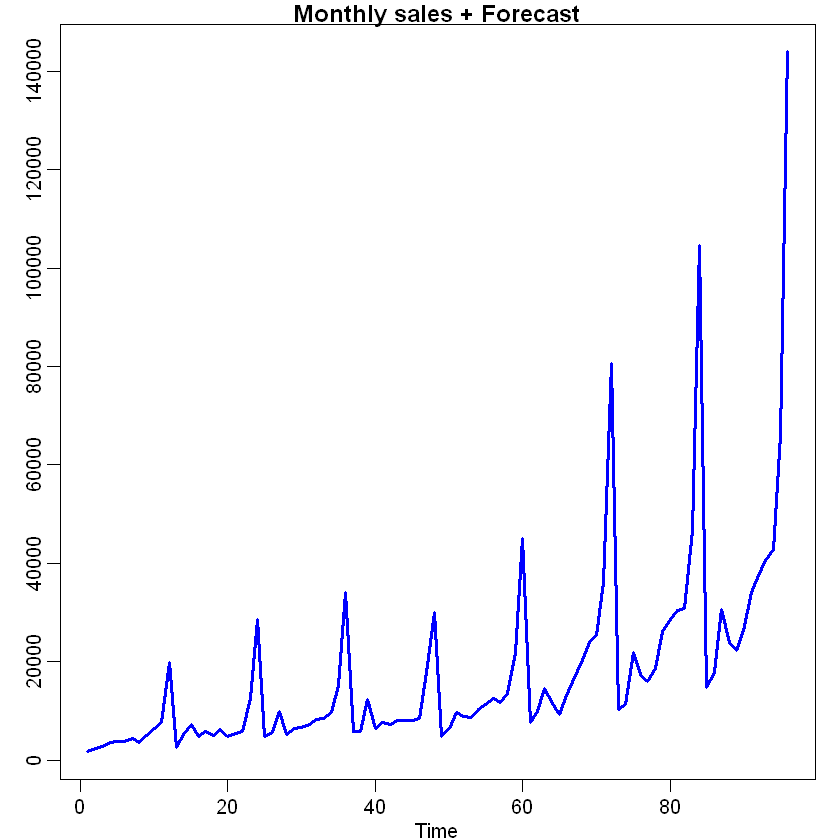

In [9]:
a<-sarima.for(log(suv),12,1,1,0,0,1,1,12)

plot.ts(c(suv,exp(a$pred)), main='Monthly sales + Forecast', ylab='', col='blue', lwd=3)